# Almog PIV project

Figures only, see two other notebooks

1. analysis_
2. normalize_



In [32]:
from pivpy import pivpy, io, graphics
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path

plt.rcParams["figure.figsize"] = (10, 10)

In [33]:
run_no = 1
normalized_netcdf_file = Path(f'../data/feb15_run{run_no}_normed.nc')
ds = xr.load_dataset(normalized_netcdf_file)
ds

<xarray.Dataset>
Dimensions:  (x: 102, y: 76, t: 100)
Coordinates:
  * x        (x) float64 11.9 11.78 11.66 11.54 ... 0.3534 0.2356 0.1178 0.0
  * y        (y) float64 4.519 4.401 4.283 4.165 ... -3.963 -4.081 -4.199 -4.316
  * t        (t) int64 0 1 2 3 4 5 6 7 8 9 10 ... 90 91 92 93 94 95 96 97 98 99
Data variables:
    u        (x, y, t) float64 0.7659 0.7965 0.7877 ... 0.8985 1.087 0.9414
    v        (x, y, t) float64 -0.04442 -0.02545 -0.02308 ... 0.0243 0.01646
    chc      (x, y, t) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 4.0 4.0 4.0 4.0 4.0
Attributes: (7)

## Figures

Almog prepared a document on overleaf about the PIV analysis. the link is here
https://www.overleaf.com/project/63f5eeb8f7fb1a583f248b22


1. we normalize everything to the cylinder_scale $d$ and $U_\infty$
2. We plot $V_x(y)$ to see that it is close to 1 and perpendicular to see that the flow is not affected by the walls
3. plots of $V_y(x,y=const,t_n)$ along the $x$-axis at a random time frame $t_n$
y=0 , 0.5, 0.75, 1, 2
4. plot of $V_y(x=5,y=0,t)$ where t is the time frame( frame number multiply by the average time difference between two frames)



In [34]:
# Ensemble average map:
ave = dsn.piv.average

(<Figure size 1000x1000 with 2 Axes>,
 <AxesSubplot: xlabel='x ()', ylabel='y ()'>)

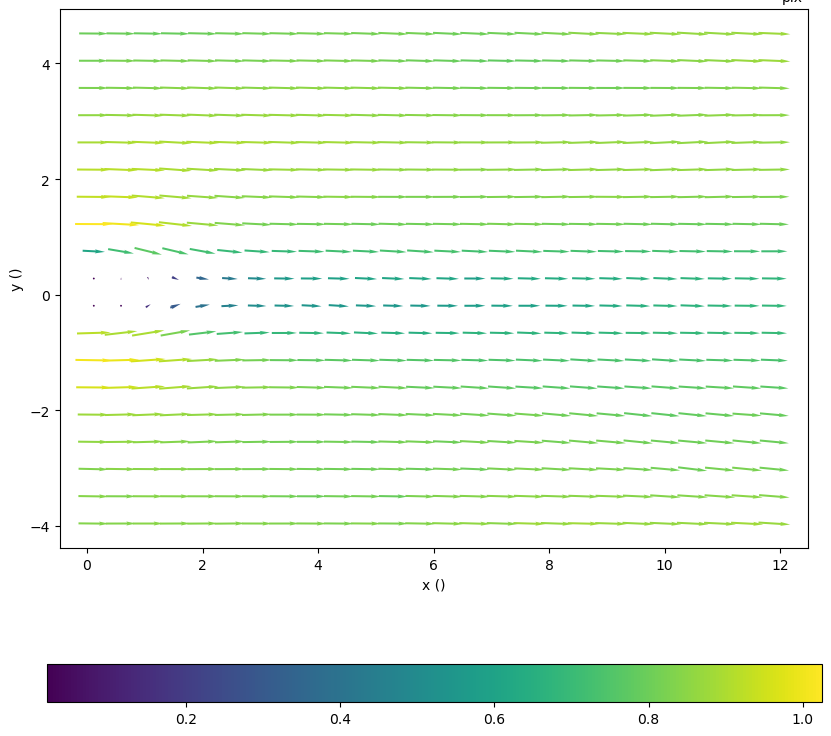

In [35]:
fig = plt.figure()
ave['x'].attrs['units'] = ''
ave['y'].attrs['units'] = ''
ave.piv.quiver(arrScale = 20,colorbar=True, colorbar_orient='horizontal', nthArr = 4, cmap='viridis')
# fig.savefig(f'../results/feb15-run{run_no}_piv_map.png')

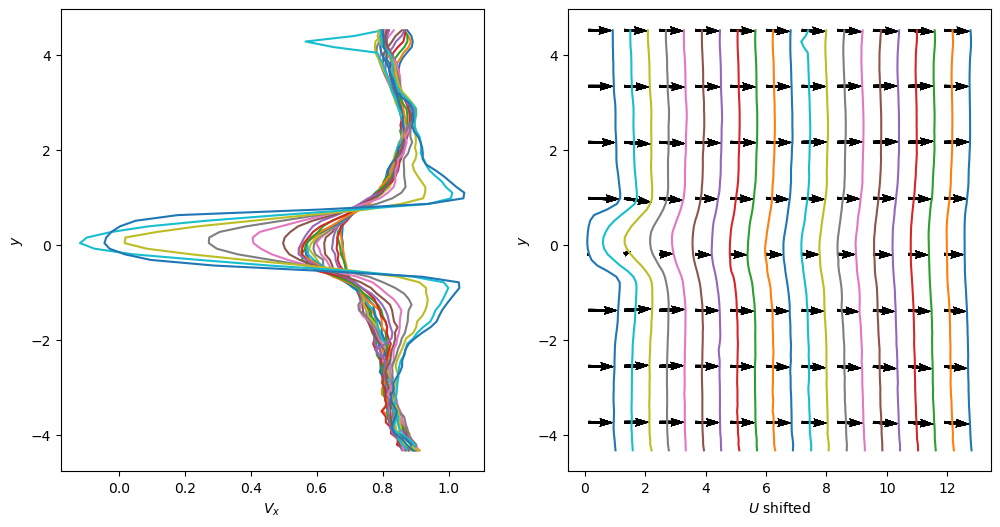

In [36]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

for x in ave.x[::5]:
    tmp = ave.sel(x=x, method='nearest')
    ax[0].plot(tmp.u, tmp.y)
    ax[0].set_xlabel('$V_x$')
    ax[0].set_ylabel('$y$')
    
    ax[1].quiver(ave['x'][::10],ave['y'][::10],ave['u'][::10,::10].T,ave['v'][::10,::10].T)
    ax[1].plot(tmp.u + x, tmp.y)
    ax[1].set_xlabel('$U$ shifted')
    ax[1].set_ylabel('$y$')


# fig.savefig(f'../results/feb15-run{run_no}_profiles_Utheo.png')

3 plots of $V_y(x,y=const,t_n)$ along the $x$-axis at a random time frame $t_n$
y=0 , 0.5, 0.75, 1, 2


(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 't = 50 [frame]'}, xlabel='x (pix)', ylabel='y (pix)'>)

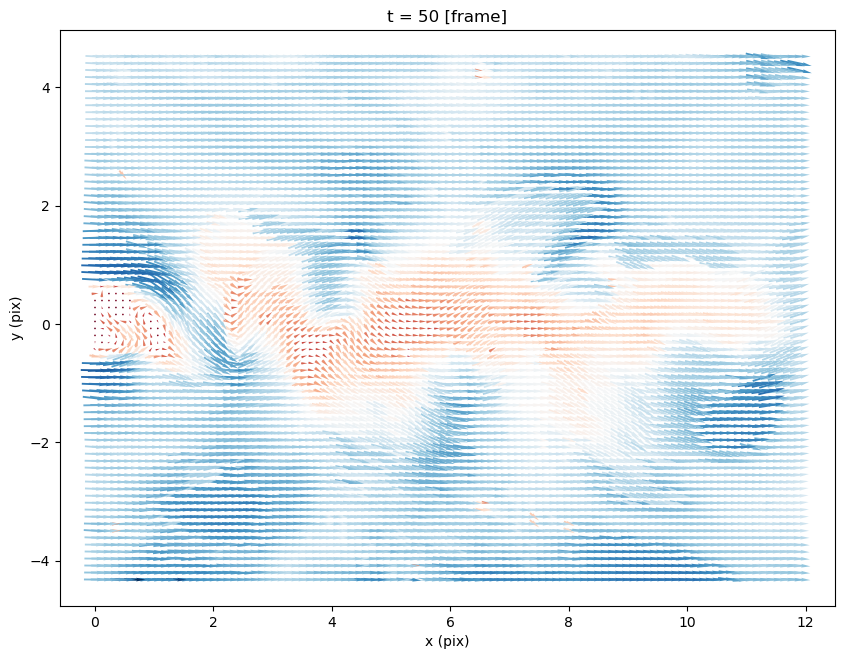

In [37]:
tmp = ds.isel(t=50)
# let's see the selected map
tmp.piv.quiver()

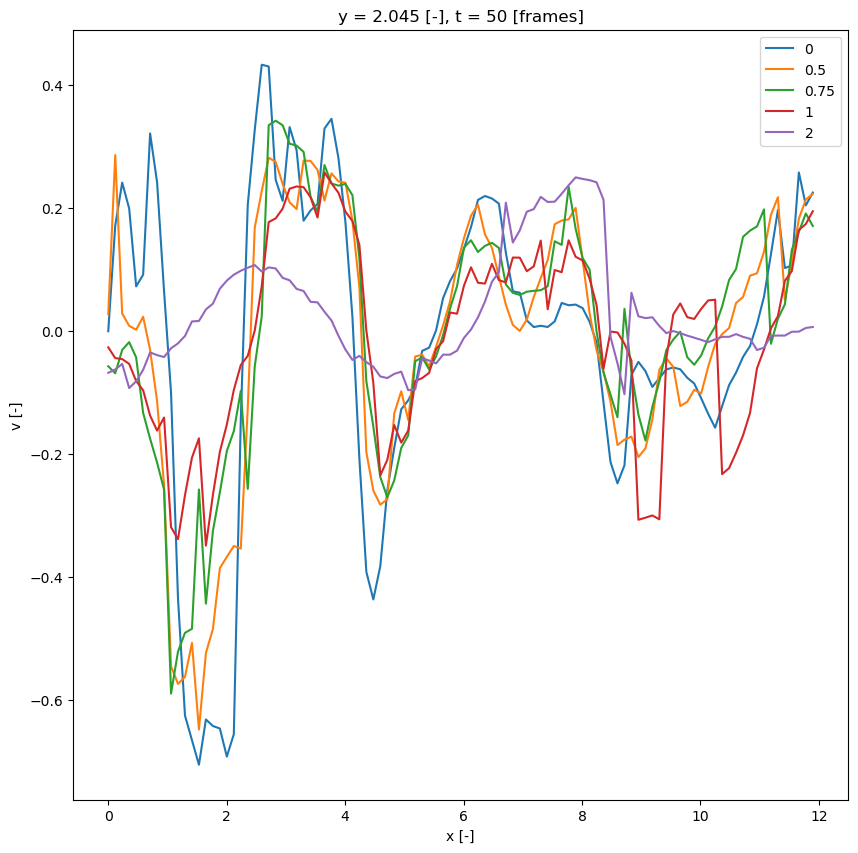

In [38]:
ds['u'].attrs['units'] = '-'
ds['v'].attrs['units'] = '-'
ds['x'].attrs['units'] = '-'
ds['y'].attrs['units'] = '-'
ds['t'].attrs['units'] = 'frames'

plt.figure()
for y in [0 , 0.5, 0.75, 1, 2]:
    ds['v'].isel(t=50).sel(y=y,method='nearest').plot.line(label=str(y))
    
plt.legend()
fig.savefig('../resuts/vy_vs_x_at_tn.png',dpi=100)

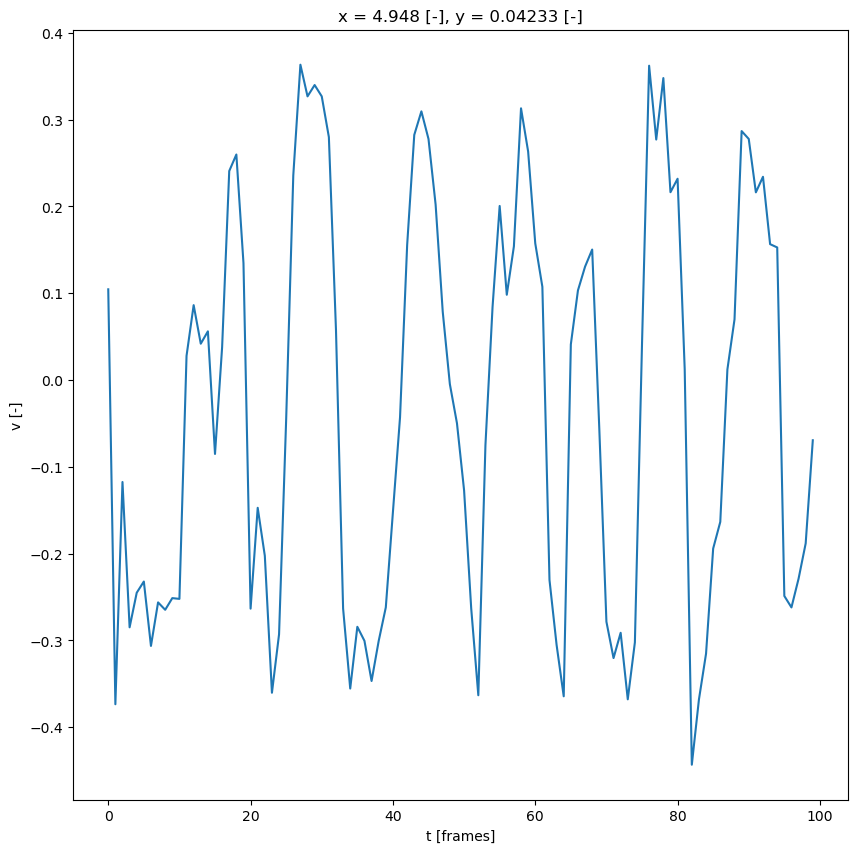

In [43]:
# Vy(x = 5, y = 0, t)

# plt.figure()
ds['v'].attrs['units'] = '-'
ds['t'].attrs['units'] = 'frames'

ds['v'].sel(x=5,y=0,method='nearest').plot.line()
    
# plt.legend()
fig.savefig('../results/vy_vs_t_at_x5.png',dpi=100)